### Work book by Jack Feds, 3/18/2021

In [19]:
import numpy as np
from numpy import random as rnd
from numpy import matrix as matrix
from numpy import ogrid as ogrid
import matplotlib.pyplot as plt
import matplotlib as matplot
import time as time

#List_Of_Coeffs = []

# This cell applies least square of fitting data from Chpt 9.2 of LA and DE with applications in MatLab by Golubitsky and Dellnitz

Cost value minimized : 16.53414194722372


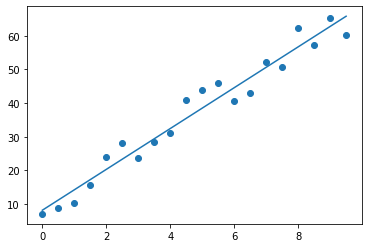

In [20]:
#Generate x as from 0 to 10 with step of 0.5
x=np.arange(0,10,0.5)

#Generate y as a line of y=mx+b with added noise from np.random
y = 6*x + 3 + 3* rnd.uniform(0,4,len(x))

#Concatenate F1 and X into A
A=np.column_stack((np.ones_like(x),x))

# plot (x,y)s as points
plt.scatter(x,y)

#Calculating (At*A)^-1
inv = np.linalg.inv(np.matmul(matrix.getT(A),matrix.getA(A)))

#Calculating B0
coeffs = np.matmul(np.matmul(inv,matrix.getT(A)),y)

#Taking terms from B0 and putting them to lsrl
lsrl = coeffs[1]*x+coeffs[0]*np.ones_like(x)

#Plotting the lsrl against the (x,y) points
plt.plot(x,lsrl)

#Returning minimized length
print("Cost value minimized : "+ str(np.linalg.norm(y-lsrl)))



# The next cell applies the general case to quadratic trends

Cost value minimized : 103.33177070405158


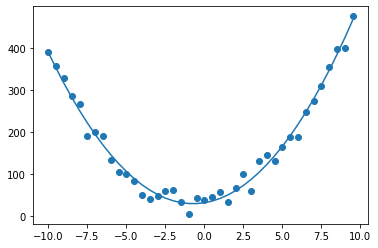

In [21]:
#Generate x as from 0 to 10 with step of 0.5
x=np.arange(-10,10,0.5)

#Generate y as a line of y=mx+b with added noise from np.random
y = 4*x**2 + 6*x + 3 + 3* rnd.uniform(0,20,len(x))

#Concatenate F1, x, and x**2 into A
A=np.column_stack((np.ones_like(x),x,x**2))

# plot (x,y)s as points
plt.scatter(x,y)

#Calculating (At*A)^-1
inv = np.linalg.inv(np.matmul(matrix.getT(A),matrix.getA(A)))

#Calculating B0
coeffs = np.matmul(np.matmul(inv,matrix.getT(A)),y)

#Taking terms from B0 and putting them to lsrl
lsrl = coeffs[2]*(x**2) + coeffs[1]*x + coeffs[0]*np.ones_like(x)

#Plotting the lsrl against the (x,y) points
plt.plot(x,lsrl)

#Returning minimized length
print("Cost value minimized : "+ str(np.linalg.norm(y-lsrl)))

# The next example uses the following Trig Identity:
###                 A*Cos(px) + BSin(px) = R*Cos(px-d)
###                 where R = sqrt(A**2 + B**2) and d = Arctan(B/A)


Cost value minimized : 3.871255014813708


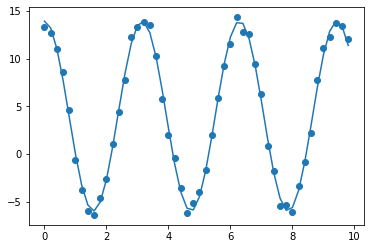

In [22]:
#Generate x as from 0 to 50 with step of 0.2
x=np.arange(0,10,0.2)

#Definining Period of function
Freq = 2

#Generate y as a line of y=mx+b with added noise from np.random
y = 10*np.sin((Freq)*x  + rnd.uniform(0,3.14159)) + 3 + rnd.uniform(0,2,len(x))

#Concatenate F1, Cos(x), and Sin(x) into A
A = np.column_stack((np.ones_like(x),np.cos((Freq)*x),np.sin((Freq)*x)))

# plot (x,y)s as points
plt.scatter(x,y)

#Calculating (At*A)^-1
inv = np.linalg.inv(np.matmul(matrix.getT(A),matrix.getA(A)))

#Calculating B0
coeffs = np.matmul(np.matmul(inv,matrix.getT(A)),y)

#Taking terms from B0 and putting them to lsrl
lsrl = coeffs[2]*(np.sin((Freq)*x)) + coeffs[1]*(np.cos((Freq)*x)) + coeffs[0]*np.ones_like(x)

#Plotting the lsrl against the (x,y) points
plt.plot(x,lsrl)


#Returning minimized length
print("Cost value minimized : "+ str(np.linalg.norm(y-lsrl)))

# The next section of this workbook will compare the method of Gradient Descent to Linear Regression

### We will begin by developing a technique to graph level curves in R2

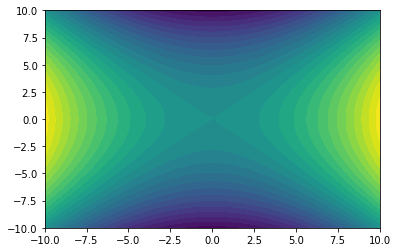

In [23]:
#Demo of pyplot contour function
x_lin = np.linspace(-10,10,40)
y_lin = np.linspace(-10,10,40)
X, Y = np.meshgrid(x_lin, y_lin)
def F(Point):
    return (Point[0]**2 - Point[1]**2)
plt.contourf(X,Y,F(np.meshgrid(x_lin,y_lin)),levels=30)

## next we develop derivatives, partial derivatives, and the gradient

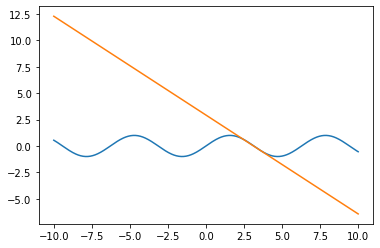

In [24]:
def derivative(function, x):
    eps = 500* np.finfo(float).eps
    rise = function(x+eps) - function(x-eps)
    run = 2*eps
    return rise/run

def function(x):
    return np.sin(x)

x = 3.5

x_axes = np.linspace(-10,10,500)

slope = derivative(function,x)

line = slope*(x_axes-x) + function(x)

plt.plot(x_axes,function(x_axes))

plt.plot(x_axes,line)

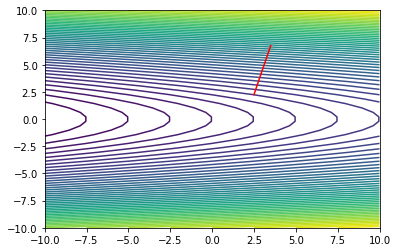

In [25]:
#creating a partial derivative function with machine epsilon
def partial_derivative(function, point, index):
    eps = np.zeros_like(point,dtype=float)
    eps[index] = 999*np.finfo(float).eps
    change = function(point + eps) - function(point - eps)
    distance = 2*999*np.finfo(float).eps
    return change / distance

#using partial derivative to form the gradient as a list by components
def gradient(function, point):
    grad = []
    for ind in range(0,len(point)):
        list.append(grad,partial_derivative(function,point,ind))
    return grad
    #print(grad)
        
#defining the function of several variables and a point where we will graph the gradient#
def Function(point):                                                                    #
    return(point[0] + point[1]**2)                                                      #
                                                                                        #
point = np.array((2.5,2.25))                                                            #
#########################################################################################

#setting up R2
x_axes = np.linspace(-10,10,50)
y_axes = np.linspace(-10,10,50)

X, Y   = np.meshgrid(x_axes,y_axes)
points = np.meshgrid(x_axes,y_axes)

#plotting our functions level curves in R2
plt.contour(X,Y,Function(points),levels=50)

#using the gradient function we defined earlier
grad_vect = gradient(Function,point)
x_points = [point[0], point[0]+grad_vect[0]]
y_points = [point[1], point[1]+grad_vect[1]]
#plotting the gradient over our functions graph in R2
#plt.plot(x_points,y_points, color = 'red')

#plotting the unit gradient over our functions graph in R2
unit_grad = grad_vect# / np.linalg.norm(grad_vect)
x_points = [point[0], point[0]+unit_grad[0]]
y_points = [point[1], point[1]+unit_grad[1]]
plt.plot(x_points,y_points, color = 'red')



## The last part of gradient descent we develop is the line search
#### It prevents the algorithm from overshooting past a minima

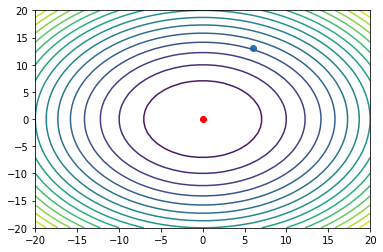

In [26]:
#creating a function to be called several times
def line_search(function, point, gradient, step, max_iterations):
    
    iteration = 0
    
    unit_gradient = gradient / np.linalg.norm(gradient)
    
    point1 = point
    point2 = point1 - (step * unit_gradient)
    
    if function(point2) > function(point1): #Initial test to make sure Point 1 not a minima
        #print("Point is already a minima")
        return point1
    else:
        
        while function(point2) < function(point1) and iteration < max_iterations: #repeated steps along the line
            point1 = point2
            point2 = point2 - (step * unit_gradient)
            iteration = iteration + 1
            
    if iteration >= max_iterations:
        #print("this attempt ran out of trials and got to the point" + str(point1))
        return point1
    else:
        #print("this attempt successfully found a minima at the point" + str(point1))
        return point1
        
        
#Optional test on parabola in 2D     
        
#def quadratic(x):
#    return x**2

#line_search(quadratic,-10,-5,0.1,500)

x_axes = np.linspace(-20,20,40)
y_axes = np.linspace(-20,20,40)

points = np.meshgrid(x_axes,y_axes)

#plt.plot(x_axes,quadratic(x_axes))

    
def multivar_function(point):
    return point[0]**2 + point[1]**2

point = [6,13]

grad = gradient(multivar_function,point)

step = 0.1

max_iterations = 400

plt.contour(x_axes, y_axes, multivar_function(points),levels = 15)
plt.scatter(point[0],point[1])

#In this test, it should find ~(zero,zero) because all gradients point to the center of the circles
line_search(multivar_function,point,grad,step,max_iterations)
plt.scatter(line_search(multivar_function, point, grad, step, max_iterations)[0],
            line_search(multivar_function, point, grad, step, max_iterations)[1],
            color = 'red')

# Finally, we will loop multiple line searches in against the gradient

0.010663969861109708
[ 0.37970283 -0.21473504]


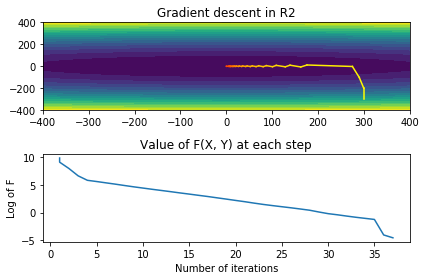

In [40]:
global list_of_grad_iters
global list_of_values

list_of_grad_iters = []
list_of_values = []
plt.subplot(2,1,1)




def gradient_descent(function, point, step, mline_iter, mgrad_iter):
    global list_of_grad_iters
    global list_of_values
    grad_iter = 1
    
    gradient_vector = gradient(function, point)
    unit_gradient = gradient_vector / np.linalg.norm(gradient_vector)
    
    point1 = point
    point2 = line_search(function, point, unit_gradient, step, mline_iter)
    
    #checking to make sure the initial point is not already a minima
    if function(point2) >= function(point1):
        
        #Return information about initial point
        print("Initial point was already a minima")
        print(str(point1))
        
        #Plotting the single point that is a minima
        plt.scatter(point1[0],point1[1],color='Green')
        
    #Begin looping multiple line searches against gradient to find minima
    else:
        list.append(list_of_grad_iters,grad_iter)
        list.append(list_of_values,function(point1))
        
        rgb_ticker = 1 #used to phase from yellow to red as function decreases
        while function(point2) < function(point1) and grad_iter <= mgrad_iter: 
            #plot the line searches result
            plt.plot([point1[0],point2[0]],[point1[1],point2[1]],color = ((1,max(rgb_ticker,0),0)))
            
            #calculating new gradient direction
            point1 = point2
            gradient_vector = gradient(function, point1)
            unit_gradient = gradient_vector / np.linalg.norm(gradient_vector)
            
            #line search again for a new step
            point2 = line_search(function, point1, unit_gradient, step, mline_iter)
            
            #changing color of future step
            rgb_ticker = rgb_ticker - 0.02
            
            #recording grad_it of new step
            list.append(list_of_grad_iters,grad_iter)
            list.append(list_of_values,function(point1))
            
            #counting number of steps. which is the number of line searches, not line search steps
            grad_iter = grad_iter + 1
        
            #updating the plot then pausing for a brief amount of time to see steps


    #Printing the minima and its coordinate found by gradient descent
    print(function(point1))
    print(point1)
    

    
    
    
#Defining F(X,Y) with elements from the list point######################
def function(point):                                                   #
    return 0.01*point[0]**2 + 0.2*point[1]**2                          #
######################################################################## You can change this to try different functions


#Setting up R2#########################
x_axes = np.linspace(-400,400,800)    #
y_axes = np.linspace(-400,400,800)    #
coords = np.meshgrid(x_axes,y_axes)   #
####################################### You change change this for a different window

#Plotting the level curves of F(X,Y)
plt.contourf(x_axes, y_axes, function(coords),levels = 20)

#Plotting the gradient steps over the level curves
Initial_Point = [300,-300]
Step_Size = 0.5
Maximum_Line_Search_Steps = 200
Maximum_Gradient_Descent_Steps = 200
gradient_descent(function,
                 Initial_Point,
                 Step_Size,
                 Maximum_Line_Search_Steps,
                 Maximum_Gradient_Descent_Steps)
plt.title("Gradient descent in R2")

#Plotting the decrease of F(X, Y) over the steps
plt.subplot(2,1,2)
plt.plot(list_of_grad_iters,np.log(list_of_values))
plt.title("Value of F(X, Y) at each step")
plt.ylabel("Log of F")
plt.xlabel("Number of iterations")
plt.subplots_adjust(hspace=20)
plt.tight_layout()






# Lastly, we can use Gradient Descent as an alternative to Linear Regression

Cost value minima of : 16.799448388543325
with slope of 6.0254598212680275and intercept of 10.792756300635018


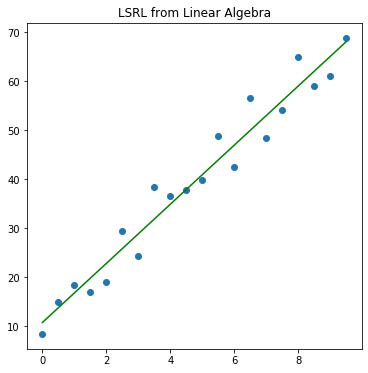

In [61]:
#From earlier
#Generate x as from 0 to 10 with step of 0.5
global x
x=np.arange(0,10,0.5)


#Generate y as a line of y=mx+b with added noise from np.random
global y
y = 6*x + 12 + 3 * rnd.uniform(-2,2,len(x))

#Concatenate F1 and X into A
A=np.column_stack((np.ones_like(x),x))

# plot (x,y)s as points
plt.figure(figsize = (6,6))
plt.scatter(x,y)

#Calculating (At*A)^-1
inv = np.linalg.inv(np.matmul(matrix.getT(A),matrix.getA(A)))

#Calculating B0
coeffs = np.matmul(np.matmul(inv,matrix.getT(A)),y)

#Taking terms from B0 and putting them to lsrl
lsrl = coeffs[1]*x+coeffs[0]*np.ones_like(x)

#Plotting the lsrl against the (x,y) points
plt.plot(x,lsrl,color = 'g')
plt.title("LSRL from Linear Algebra")

#Returning minimized length
print("Cost value minima of : "+ str(np.linalg.norm(y-lsrl)))
print("with slope of " + str(coeffs[1]) + "and intercept of " + str(coeffs[0]))

Gradient descent found a minima of the cost funciton of value 16.801252066769116
Minima achieved with slope of 6.034975333736921and intercept of 10.699833540059668


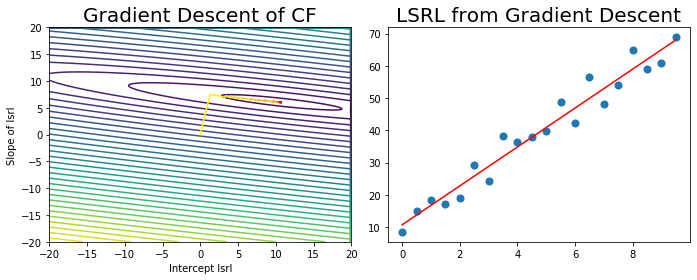

In [62]:
#Gradient Descent function from earlier with plotting location changed
def gradient_descent(function, point, step, mline_iter, mgrad_iter):
    global list_of_grad_iters
    list_of_grad_iters = []
    global list_of_values
    list_of_values = []
    grad_iter = 1
    
    gradient_vector = gradient(function, point)
    unit_gradient = gradient_vector / np.linalg.norm(gradient_vector)
    
    point1 = point
    point2 = line_search(function, point, unit_gradient, step, mline_iter)
    
    #checking to make sure the initial point is not already a minima
    if function(point2) >= function(point1):
        
        #Return information about initial point
        print("Initial point was already a minima")
        print(str(point1))
        
        #Plotting the single point that is a minima
        ax1.scatter(point1[0],point1[1],color='Green')
        
    #Begin looping multiple line searches against gradient to find minima
    else:
        list.append(list_of_grad_iters,grad_iter)
        list.append(list_of_values,function(point1))
        
        rgb_ticker = 1 #used to phase from yellow to red as function decreases
        while function(point2) < function(point1) and grad_iter <= mgrad_iter: 
            #plot the line searches result
            ax1.plot([point1[0],point2[0]],[point1[1],point2[1]],color = ((1,max(rgb_ticker,0),0)))
            
            #calculating new gradient direction
            point1 = point2
            gradient_vector = gradient(function, point1)
            unit_gradient = gradient_vector / np.linalg.norm(gradient_vector)
            
            #line search again for a new step
            point2 = line_search(function, point1, unit_gradient, step, mline_iter)
            
            #changing color of future step
            rgb_ticker = rgb_ticker - 0.013
            
            #recording grad_it of new step
            list.append(list_of_grad_iters,grad_iter)
            list.append(list_of_values,function(point1))
            
            #counting number of steps. which is the number of line searches, not line search steps
            grad_iter = grad_iter + 1
        
    return point1



#Defining Sum of Square of Residuals with elements from the list point
def Cost_Function(point): 
    return np.linalg.norm(y - point[1]*x - point[0]*np.ones_like(x))


#Plotting level curves of Cost_Function
slope = np.linspace(-20, 20, 401)
intercept = np.linspace(-20, 20, 401)
plane = np.zeros(shape=(slope.size,intercept.size))
for i in range(0,len(slope)-1):
    for j in range(0,len(intercept)-1):
        plane[i][j] = Cost_Function([intercept[j],slope[i]])
        
        
#Plotting two separate plots, one for the gradient descent, another for the actual lsrl      
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.contour(intercept,slope,plane,levels = 30)

#Using gradient descent on the coeffecients of the lsrl
initial_point = [0,0]
step_size = 0.01
max_line_iterations = 200
max_gradient_iterations = 200

#Storing minima location from gradient descent
coefficients = gradient_descent(Cost_Function, 
                 initial_point, 
                 step_size, 
                 max_line_iterations, 
                 max_gradient_iterations)

#generating LSRL equation
lsrl = coefficients[1]*x + coefficients[0]*np.ones_like(x)

#Plotting level curves and gradient descent steps
ax1.set_xlabel("Intercept lsrl")
ax1.set_ylabel("Slope of lsrl")
ax1.set_title("Gradient Descent of CF",size = 20)


#Plotting LSRL and data points
ax2.scatter(x,y,s=50)
ax2.plot(x,lsrl,color = 'r')
ax2.set_title("LSRL from Gradient Descent",size = 20)
plt.tight_layout()


#Returning minima and its location
print("Gradient descent found a minima of the cost funciton of value "+str(Cost_Function(coefficients)))
print("Minima achieved with slope of "+str(coefficients[1])+"and intercept of "+str(coefficients[0]))

# Work Cited
##### “Gradient Descent.” Wikipedia, Wikimedia Foundation, 13 Mar. 2021, en.wikipedia.org/wiki/Gradient_descent. 
##### Golubitsky, Martin, and Michael Dellnitz. Linear Algebra and Differential Equations Using Matlab. Brooks/Cole, 1999. 